In [1]:
%cd ..

/Users/boiquach/Documents/Tayer/project/Cogito_Assignment/leave_classification


# Import packages and modules

In [7]:
import os
import cv2
from src.helper.helpers import __features__, prod_parameters, __prod_encoder_file__, __prod_encoders_folder__, __prod_decoders_folder__, __prod_decoder_file__
from src.models.run_prediction_prod import predict_image, get_image_from_name
import matplotlib.pyplot as plt
%matplotlib inline
import re
import warnings
warnings.filterwarnings('ignore')

# Import model paths

In [3]:
encoder_paths = []
for feature in __features__:
    l2_rate = prod_parameters[feature][0]
    dropout = prod_parameters[feature][1]
    encoder_model_file = __prod_encoder_file__.format(feature,l2_rate,dropout)
    encoder_path  = os.path.join(__prod_encoders_folder__, encoder_model_file)
    encoder_paths.append(encoder_path)

decoder_path = os.path.join(__prod_decoders_folder__, __prod_decoder_file__)

# Upload image files from local

In [4]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()

image_paths = list(filedialog.askopenfilenames(filetypes=[('Images','*.jpg *.jpeg *.png')]))
root.destroy()
root.quit()

2022-07-25 10:50:31.899 Python[85006:13036898] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to (null)


# Prediction

In [5]:
y_pred_names = predict_image(image_paths, encoder_paths, decoder_path)
predicted_images = [get_image_from_name(name) for name in y_pred_names]

2022-07-25 10:50:42.533647: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading encoder  models/prod_models/encoders/PROD_ENCODER-image-l2rate0.0001-dropout0.5.h5
Loading encoder  models/prod_models/encoders/PROD_ENCODER-vein-l2rate0.001-dropout0.5.h5
Loading encoder  models/prod_models/encoders/PROD_ENCODER-xyprojection-l2rate0.1-dropout0.5.h5
Loading encoder  models/prod_models/encoders/PROD_ENCODER-color-l2rate0.01-dropout0.5.h5
Loading encoder  models/prod_models/encoders/PROD_ENCODER-texture-l2rate0.01-dropout0.5.h5
Loading encoder  models/prod_models/encoders/PROD_ENCODER-fourier-l2rate0.1-dropout0.5.h5
Loading encoder  models/prod_models/encoders/PROD_ENCODER-shape-l2rate0.001-dropout0.5.h5


2022-07-25 10:50:43.126668: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


# Visualisation

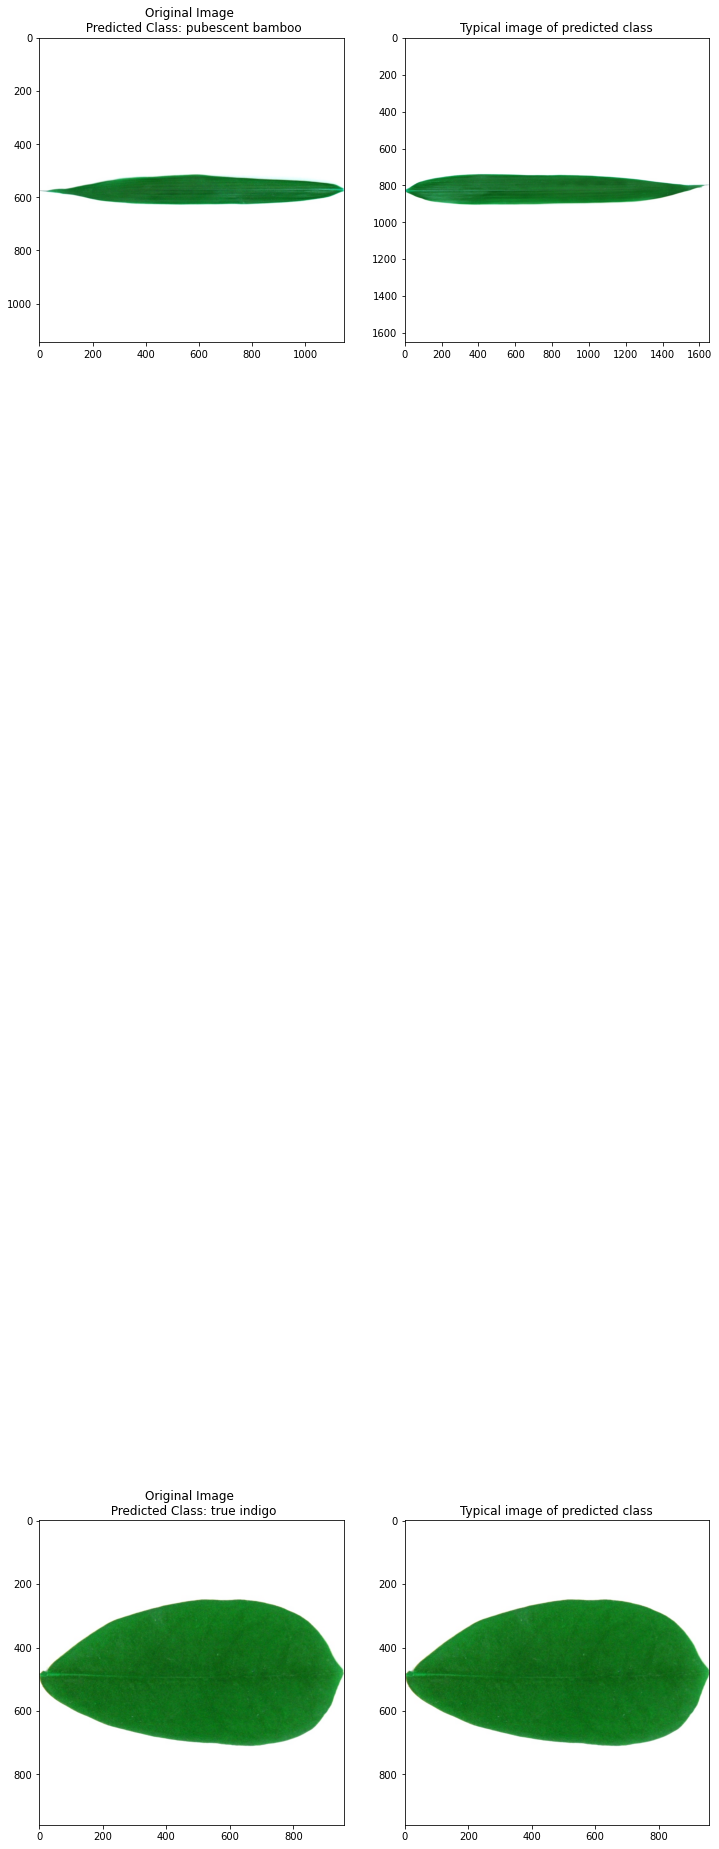

In [8]:
ncols = 2
nrows = len(image_paths)
fig = plt.figure(figsize=(12,50))

for row in range(nrows):
    for col in range(ncols):
        if col%2 == 0:
            if row == 0:
                index = 1
            else:
                index = row*2 + 1
            img_path = image_paths[row]
            image = cv2.imread(img_path)
            fig.add_subplot(nrows, ncols, index)
            plt.imshow(image)
            plt.title(f"Original Image \n Predicted Class: {y_pred_names[row]}")
            
        else:
            if row == 0:
                index = 2
            else:
                index = row*2 + 2
            fig.add_subplot(nrows, ncols, index)
            plt.imshow(predicted_images[row]) 
            plt.title("Typical image of predicted class")
plt.show()